In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("global_heat_index.csv")

In [3]:
data.head(5)

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   17520 non-null  int64  
 1   Month                  17520 non-null  int64  
 2   Day                    17520 non-null  int64  
 3   Hour                   17520 non-null  int64  
 4   Dew Point              17520 non-null  int64  
 5   Temperature            17520 non-null  float64
 6   Pressure               17520 non-null  float64
 7   Relative Humidity      17520 non-null  float64
 8   Wind Direction         17520 non-null  float64
 9   Wind Speed             17520 non-null  float64
 10  Solar Radiation (GHI)  17520 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.5 MB


## Cleaning the data

In [5]:
clean1=data[data["Hour"]<6]
clean2=data[data["Hour"]>18]

print("Cleaning Data from 12.00 to 5.59 am")
clean1.head(10)

Cleaning Data from 12.00 to 5.59 am


,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0
5,2011,1,1,5,1,8.098655,985.723206,65.278494,89.290062,1.937899,0
24,2011,1,2,0,3,10.231350,984.838196,61.345492,79.954536,2.360912,0
25,2011,1,2,1,3,9.653407,984.457092,63.566375,87.481873,2.193934,0
26,2011,1,2,2,3,9.165823,984.032227,66.509376,90.634872,1.904846,0
27,2011,1,2,3,3,8.773836,984.161560,69.923065,90.924843,1.597840,0


In [6]:
print("Cleaning Data from 18.00 to 12.00 am")
clean2.head(10)

Cleaning Data from 18.00 to 12.00 am


,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
19,2011,1,1,19,4,13.915211,987.175781,52.122064,38.189991,2.709682,0
20,2011,1,1,20,3,13.106395,987.245666,53.782549,45.614468,2.713746,0
21,2011,1,1,21,3,12.326217,986.971375,55.613451,53.939449,2.701125,0
22,2011,1,1,22,3,11.570982,986.042419,57.458358,62.491528,2.639709,0
23,2011,1,1,23,3,10.869849,985.439819,59.446614,71.250389,2.511646,0
43,2011,1,2,19,5,14.152280,987.563416,54.899280,64.419899,2.399542,0
44,2011,1,2,20,4,13.421063,987.949341,55.893813,73.117203,2.673051,0
45,2011,1,2,21,4,12.687589,987.704529,57.250441,81.467941,2.940782,0
46,2011,1,2,22,4,11.969086,987.413086,58.991594,89.379547,3.099676,0
47,2011,1,2,23,4,11.248868,986.698791,61.125686,96.687325,3.158645,0


In [7]:
data = data.drop(clean1.index,axis=0)
# it will remove all the data with the indexes in axis 0(row wise)
data = data.drop(clean2.index,axis=0)

In [8]:
print("Cleaned Data Description : ")
data.describe()

Cleaned Data Description : 


,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
count,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000
mean,2011.500000,6.526027,15.720548,12.000000,11.172603,29.843403,979.837013,41.346867,192.621930,2.404642,433.934668
std,0.500026,3.448033,8.796710,3.741855,11.204963,8.272602,6.183468,25.653292,98.401266,1.241931,307.352650
min,2011.000000,1.000000,1.000000,6.000000,-28.000000,5.063506,964.755859,0.921771,0.034660,0.030113,0.000000
25%,2011.000000,4.000000,8.000000,9.000000,2.000000,24.991642,974.409988,18.638580,98.280884,1.488960,148.000000
50%,2011.500000,7.000000,16.000000,12.000000,11.000000,30.117739,980.606934,39.359365,230.102280,2.246798,446.000000
75%,2012.000000,10.000000,23.000000,15.000000,22.000000,34.920360,985.049332,61.814032,258.325935,3.153406,693.000000
max,2012.000000,12.000000,31.000000,18.000000,27.000000,52.157927,993.353210,100.000000,359.821167,7.287084,1001.000000


In [9]:
print("Cleaned Data :")
data.head(5)

Cleaned Data :


,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175,0
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310,0
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363
10,2011,1,1,10,3,18.956082,988.054504,36.747087,72.488327,0.545695,533


In [10]:
data.shape

(9490, 11)

## Preparing Training And Testing Data

In [11]:
x = data.iloc[ : , 4:10].values
y = data.iloc[ : , 10].values

y = y.reshape(-1, 1)
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 0)

In [12]:
print(x_train)

[[ 23.          28.95276574 974.4337769   72.00650744 230.5746765
    3.48527336]
 [  7.          31.45725588 982.7936401   21.82772614  43.92575455
    1.79098237]
 [  5.          45.90862693 977.0198364    9.19367135 256.100769
    2.31313491]
 ...
 [  1.          17.1015701  988.6531982   34.68437781   9.09429932
    1.42941236]
 [ 24.          25.72412262 975.875       95.01792758 211.7336121
    2.95700026]
 [ 25.          28.49819406 974.4430542   83.5370614  239.0466156
    2.56590128]]


In [13]:
print(y_train)

[[178]
 [602]
 [830]
 ...
 [231]
 [162]
 [384]]


## Standardizing Data

In [14]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform (x_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

In [15]:
print(x_train)

[[ 1.05968611 -0.10596836 -0.86953246  1.20221031  0.39135863  0.85990992]
 [-0.37392147  0.19583916  0.47710333 -0.76144896 -1.50792046 -0.50344039]
 [-0.55312242  1.93732438 -0.45296102 -1.2558607   0.65110389 -0.08327831]
 ...
 [-0.91152432 -1.53411535  1.4209813  -0.25832627 -1.86235409 -0.79438603]
 [ 1.14928659 -0.49504108 -0.63737524  2.10272218  0.19963805  0.43482279]
 [ 1.23888706 -0.16074724 -0.86803804  1.65343846  0.47756634  0.12011598]]


In [16]:
print(y_train)

[[-0.83425739]
 [ 0.55048309]
 [ 1.29510768]
 ...
 [-0.66116483]
 [-0.88651175]
 [-0.16148254]]


# <font color = "green">K - Means with 6 Clusters </font>

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 6 , random_state = 0 )
kmeans = kmeans.fit(x_train)

C:\Users\hudai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [18]:
# view predict class
labels = kmeans.labels_
print("Labels :",labels)

# view cluster centers
cluster_centers = kmeans.cluster_centers_
print("\n\n Cluster Centroids :\n",cluster_centers)

Labels : [2 0 1 ... 3 2 2]


 Cluster Centroids :
 [[-0.61067852 -0.22953897  0.85296425 -0.56900073 -1.34754782 -0.69944564]
 [-1.06683181  0.69953201  0.04271687 -1.16744214  0.83124334  0.01402357]
 [ 1.18732212  0.07003915 -0.93122377  1.27431066  0.25433125 -0.09787964]
 [-0.65151081 -1.64656972  1.18139577  0.26109687 -1.09473473 -0.02650561]
 [ 0.14674628 -0.38089807  0.65185994  0.19276176  0.69268634 -0.79074361]
 [ 0.40401817  1.04788338 -1.07514525 -0.40467305  0.50974261  1.49618357]]


Here from above we can see six different planes (Dew Point	Temperature	Pressure	Relative Humidity	Wind Direction	Wind Speed) because when we are passing 6 data points for traing the data and now we are having six dimensional space where we have six clusters now its hard to visualise

## <font color="green">Applying PCA Dimensionality Reduction</font>

In [19]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2) .fit(x_train) .transform(x_train)

In [20]:
pca

array([[-1.59837425, -1.04649685],
       [ 1.2422458 ,  0.2751212 ],
       [-0.79398024,  2.07624203],
       ...,
       [ 2.88500539, -0.70662158],
       [-1.31961631, -2.03068811],
       [-1.55187659, -1.6325982 ]])

In [21]:
pca.shape[0]

7592

In [22]:
len(labels)

7592

In [23]:
x_train

array([[ 1.05968611, -0.10596836, -0.86953246,  1.20221031,  0.39135863,
         0.85990992],
       [-0.37392147,  0.19583916,  0.47710333, -0.76144896, -1.50792046,
        -0.50344039],
       [-0.55312242,  1.93732438, -0.45296102, -1.2558607 ,  0.65110389,
        -0.08327831],
       ...,
       [-0.91152432, -1.53411535,  1.4209813 , -0.25832627, -1.86235409,
        -0.79438603],
       [ 1.14928659, -0.49504108, -0.63737524,  2.10272218,  0.19963805,
         0.43482279],
       [ 1.23888706, -0.16074724, -0.86803804,  1.65343846,  0.47756634,
         0.12011598]])

As you can see in x_train is of 6 dimension but with the help of PCA we converted it into 2 dimension

## Visualisation

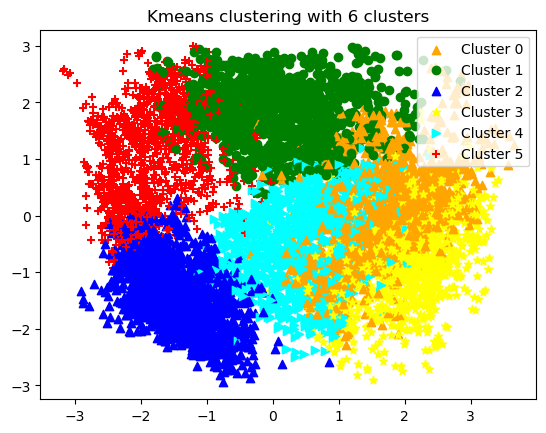

In [24]:
for i in range(pca.shape[0]):
    if kmeans.labels_[i] == 0:
        c1_6 = plt.scatter(pca[i, 0], pca[i, 1], c="orange", marker="^")
        
    elif kmeans.labels_[i] == 1:
        c2_6 = plt.scatter(pca[i, 0], pca[i, 1], c="g", marker="o")
        
    elif kmeans.labels_[i] == 2:
        c3_6 = plt.scatter(pca[i, 0], pca[i, 1], c="b", marker="^")
        
    elif kmeans.labels_[i] == 3:
        c4_6 = plt.scatter(pca[i, 0], pca[i, 1], c="yellow", marker="*")
        
    elif kmeans.labels_[i] == 4:
        c5_6 = plt.scatter(pca[i, 0], pca[i, 1], c="cyan", marker=">")
        
    elif kmeans.labels_[i] == 5:
        c6_6 = plt.scatter(pca[i, 0], pca[i, 1], c="red", marker="+")

plt.rcParams["figure.figsize"] = (12, 10)
plt.legend([c1_6, c2_6, c3_6, c4_6, c5_6, c6_6], ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5"])
plt.title("Kmeans clustering with 6 clusters")
plt.show()


for all the number of rows we are running a loop so it will go to the pca loop and we have to assign labels because we have visualise the number of clusters so here (we are having labels for each row)